In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [59]:
dt22 = pd.read_csv("D:/Users/User/Desktop/PC/Faculdade/Aprendizado de Máquinas - Mestrado/DNOPEN22.csv", sep = ";")
dt23 = pd.read_csv("D:/Users/User/Desktop/PC/Faculdade/Aprendizado de Máquinas - Mestrado/DNOPEN23.csv", sep = ";")

dt22aux = dt22[["IDADEMAE"
                ,"ESTCIVMAE"
                ,"ESCMAE"
                  ,"QTDFILVIVO" 
                  ,"QTDFILMORT" 
                  ,"CODMUNRES"
                  ,"SERIESCMAE"
                  ,"RACACORMAE"
                  ,"QTDGESTANT"
                  ,"QTDPARTNOR"
                  ,"QTDPARTCES" 
                  ,"IDADEPAI"
                  ,"GRAVIDEZ" 
                  ,"PESO"]]

dt23aux = dt23[["IDADEMAE"
                ,"ESTCIVMAE"
                  ,"ESCMAE"
                  ,"QTDFILVIVO" 
                  ,"QTDFILMORT" 
                  ,"CODMUNRES"
                  ,"SERIESCMAE"
                  ,"RACACORMAE"
                  ,"QTDGESTANT"
                  ,"QTDPARTNOR"
                  ,"QTDPARTCES" 
                  ,"IDADEPAI"
                  ,"GRAVIDEZ" 
                  ,"PESO"]]

dt_selected = pd.concat([dt22aux, dt23aux], ignore_index=True)

### Adjusting data type ###
dt_selected = dt_selected.astype({'ESTCIVMAE': 'object',
                                  'ESCMAE': 'object',
                                  'GRAVIDEZ': 'object',   
                                  'RACACORMAE': 'object',
                                  'QTDPARTNOR': 'object',
                                  'QTDPARTCES': 'object',
                                  'QTDFILMORT': 'object',
                                  'QTDFILVIVO': 'object',
                                  'QTDGESTANT': 'object'
                                 })

dt_selected.head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,SERIESCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,GRAVIDEZ,PESO
0,40.0,1.0,5.0,2.0,1.0,110037,NaN,1.0,3.0,2.0,0.0,20.0,1.0,3412.0
1,32.0,2.0,4.0,0.0,0.0,110001,3.0,1.0,0.0,0.0,0.0,28.0,1.0,3594.0
2,26.0,5.0,3.0,1.0,1.0,110001,6.0,NaN,2.0,0.0,1.0,37.0,1.0,3470.0
3,31.0,2.0,5.0,1.0,0.0,110001,NaN,4.0,1.0,0.0,1.0,40.0,1.0,3260.0
4,27.0,5.0,5.0,0.0,0.0,110001,NaN,NaN,0.0,0.0,0.0,37.0,1.0,3232.0


In [60]:
dt_selected.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093975 entries, 0 to 5093974
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   IDADEMAE    5093928 non-null  float64
 1   ESTCIVMAE   5072323 non-null  object 
 2   ESCMAE      5070814 non-null  object 
 3   QTDFILVIVO  5014418 non-null  object 
 4   QTDFILMORT  4971366 non-null  object 
 5   CODMUNRES   5093975 non-null  int64  
 6   SERIESCMAE  3291750 non-null  float64
 7   RACACORMAE  4969689 non-null  object 
 8   QTDGESTANT  5001876 non-null  object 
 9   QTDPARTNOR  4972839 non-null  object 
 10  QTDPARTCES  4960475 non-null  object 
 11  IDADEPAI    1752425 non-null  float64
 12  GRAVIDEZ    5090266 non-null  object 
 13  PESO        5093355 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 544.1+ MB


In [61]:
### Filtering just the sample with PESO fill ###
dt_selected = dt_selected[dt_selected['PESO'] > 0].reset_index(drop = True)
dt_selected['PESO_BAIXO'] = np.where(dt_selected['PESO'] < 2500, 1, 0)

print("Shape: ", dt_selected.shape)

print(f"Proporção de Baixo Peso ao Nascer: {round(100 * sum(dt_selected['PESO_BAIXO'])/dt_selected.shape[0], 2)}%")

Shape:  (5093355, 15)
Proporção de Baixo Peso ao Nascer: 9.47%


In [62]:
X = dt_selected[['IDADEMAE', 'IDADEPAI', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT'
                ,'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'GRAVIDEZ', 'RACACORMAE']]
y = dt_selected['PESO_BAIXO']

X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [63]:
print(X_train.shape)
print(X_val.shape)

(4074684, 11)
(1018671, 11)


In [64]:
round(100 * sum(y_train)/len(y_train), 2)

9.47

In [65]:
X_train['PESO_BAIXO'] = y_train

In [66]:
round(X_train.groupby("PESO_BAIXO").agg({'IDADEMAE' : ['mean','std']}), 2)

IDADEMAE      
               mean   std
PESO_BAIXO               
0             27.58  6.68
1             27.90  7.21

In [67]:
X_train['IDADEMAE_ranges'] = np.select(
    [
        X_train['IDADEMAE'] <= 16,
        (X_train['IDADEMAE'] > 16) & (X_train['IDADEMAE'] <= 25),
        (X_train['IDADEMAE'] > 25) & (X_train['IDADEMAE'] <= 35),
        (X_train['IDADEMAE'] > 35) & (X_train['IDADEMAE'] <= 45),
        X_train['IDADEMAE'] > 45
    ],
    [
        "Idade_Menor16",
        "Idade_16_25",
        "Idade_25_35",
        "Idade_35_45",
        "Idade_maior45"
    ],
    default="Unknown"
)

ranges = (
    X_train.groupby(['IDADEMAE_ranges'])
    .agg(
        Media=('PESO_BAIXO', 'mean'),
        Total=('PESO_BAIXO', 'size'),
    )
    .assign(Media = lambda x: round(x['Media'] * 100, 2))
    .reset_index()
    .rename(columns = {
        "IDADEMAE_ranges": "Idade da Mãe",
        "Media": "Média"})
)

print(ranges)

    Idade da Mãe  Média    Total
0    Idade_16_25   9.03  1549427
1    Idade_25_35   8.99  1815046
2    Idade_35_45  11.38   575296
3  Idade_Menor16  12.51   129701
4  Idade_maior45  19.75     5175
5        Unknown  10.26       39


In [68]:
round(X_train.groupby("PESO_BAIXO").agg({'IDADEPAI' : ['mean','std']}), 2)

IDADEPAI     
               mean  std
PESO_BAIXO              
0             32.11  7.7
1             32.49  8.1

In [69]:
X_train['IDADEPAI_ranges'] = np.select(
    [
        X_train['IDADEPAI'] <= 16,
        (X_train['IDADEPAI'] > 16) & (X_train['IDADEPAI'] <= 25),
        (X_train['IDADEPAI'] > 25) & (X_train['IDADEPAI'] <= 35),
        (X_train['IDADEPAI'] > 35) & (X_train['IDADEPAI'] <= 45),
        X_train['IDADEPAI'] > 45
    ],
    [
        "Idade_Menor16",
        "Idade_16_25",
        "Idade_25_35",
        "Idade_35_45",
        "Idade_maior45"
    ],
    default="Unknown"
)

ranges = (
    X_train.groupby(['IDADEPAI_ranges'])
    .agg(
        Media=('PESO_BAIXO', 'mean'),
        Total=('PESO_BAIXO', 'size'),
    )
    .assign(Media = lambda x: round(x['Media'] * 100, 2))
    .reset_index()
    .rename(columns = {
        "IDADEPAI_ranges": "Idade do Pai",
        "Media": "Média"})
)


print(ranges)

    Idade do Pai  Média    Total
0    Idade_16_25   8.71   293143
1    Idade_25_35   8.19   655858
2    Idade_35_45   9.28   383969
3  Idade_Menor16  13.30     3753
4  Idade_maior45  10.43    64477
5        Unknown   9.86  2673484


In [70]:
xtrain_grouped = (
    X_train.groupby("GRAVIDEZ")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .assign(PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2))
    .reset_index()
    .rename(columns = {"GRAVIDEZ": "Tipo de Gravidez","PESO_BAIXO" : "Baixo Peso ao Nascer"})
)

xtrain_grouped

,Tipo de Gravidez,Baixo Peso ao Nascer,Total
0,1.0,8.21,3979231
1,2.0,62.88,90488
2,3.0,96.06,1852
3,9.0,31.25,128


In [71]:
xtrain_grouped = (
    X_train.groupby("ESTCIVMAE")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .assign(PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2))
    .reset_index()
    .rename(columns = {"ESTCIVMAE": "Estado Civil da Mãe","PESO_BAIXO" : "Baixo Peso ao Nascer"})
    )

xtrain_grouped

,Estado Civil da Mãe,Baixo Peso ao Nascer,Total
0,1.0,10.04,2040365
1,2.0,8.81,1274426
2,3.0,10.91,6969
3,4.0,10.10,65364
4,5.0,8.89,656675
5,9.0,9.57,13545


In [72]:
xtrain_grouped = (
    X_train.groupby("ESCMAE")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .assign(PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2))
    .reset_index()
    .rename(columns = {"ESCMAE": "Escolaridade - Mãe","PESO_BAIXO" : "Baixo Peso ao Nascer"}))

xtrain_grouped

,Escolaridade - Mãe,Baixo Peso ao Nascer,Total
0,1.0,14.75,12376
1,2.0,11.60,43062
2,3.0,10.84,431280
3,4.0,9.37,2598100
4,5.0,8.98,955886
5,9.0,10.31,15565


In [73]:
xtrain_grouped = (
    X_train.assign(QTDFILVIVO = lambda x: np.where(x['QTDFILVIVO'] > 10.0, 10.0, x['QTDFILVIVO']))
    .groupby("QTDFILVIVO")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDFILVIVO = lambda x: x['QTDFILVIVO'].astype(int))
    .rename(columns = {"QTDFILVIVO": "Qtd. Filhos Vivos","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

xtrain_grouped

,Qtd. Filhos Vivos,Baixo Peso ao Nascer (%),Total
0,0,10.76,1668305
1,1,7.98,1309209
2,2,8.46,620307
3,3,9.64,237469
4,4,10.99,94935
5,5,12.08,42092
6,6,12.19,19894
7,7,11.97,9668
8,8,13.19,4737
9,9,14.42,2407


In [74]:
xtrain_grouped = (
    X_train.assign(QTDPARTNOR = lambda x: np.where(x['QTDPARTNOR'] > 10.0, 10.0, x['QTDPARTNOR']))
    .groupby("QTDPARTNOR")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDPARTNOR = lambda x: x['QTDPARTNOR'].astype(int))
    .rename(columns = {"QTDPARTNOR": "Qtd. Parto Normal","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

xtrain_grouped

,Qtd. Parto Normal,Baixo Peso ao Nascer (%),Total
0,0,9.57,2580644
1,1,8.95,751145
2,2,9.12,348075
3,3,9.77,156358
4,4,10.84,72138
5,5,11.64,34376
6,6,11.98,17206
7,7,12.14,8679
8,8,12.06,4312
9,9,14.55,2296


In [75]:
xtrain_grouped = (
    X_train.assign(QTDPARTCES = lambda x: np.where(x['QTDPARTCES'] > 10.0, 10.0, x['QTDPARTCES']))
    .groupby("QTDPARTCES")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDPARTCES = lambda x: x['QTDPARTCES'].astype(int))
    .rename(columns = {"QTDPARTCES": "Qtd. Parto Cesaria","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

xtrain_grouped

,Qtd. Parto Cesaria,Baixo Peso ao Nascer (%),Total
0,0,10.06,2775852
1,1,7.93,876518
2,2,8.27,251470
3,3,10.17,52616
4,4,12.81,9002
5,5,13.71,1517
6,6,17.12,292
7,7,13.33,60
8,8,18.75,16
9,9,20.00,15


In [76]:
xtrain_grouped = (
    X_train.assign(QTDFILMORT = lambda x: np.where(x['QTDFILMORT'] > 10.0, 10.0, x['QTDFILMORT']))
    .groupby("QTDFILMORT")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDFILMORT = lambda x: x['QTDFILMORT'].astype(int))
    .rename(columns = {"QTDFILMORT": "Qtd. Filhos Mortos","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

xtrain_grouped

,Qtd. Filhos Mortos,Baixo Peso ao Nascer (%),Total
0,0,9.14,3144230
1,1,10.28,659696
2,2,12.16,130449
3,3,14.45,30127
4,4,17.32,7609
5,5,18.45,2455
6,6,19.51,1030
7,7,21.00,400
8,8,19.64,224
9,9,22.58,124


In [77]:
xtrain_grouped = (
    X_train.assign(QTDFILVIVO = lambda x: np.where(x['QTDFILVIVO'] > 10.0, 10.0, x['QTDFILVIVO']))
    .groupby("QTDFILVIVO")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDFILVIVO = lambda x: x['QTDFILVIVO'].astype(int))
    .rename(columns = {"QTDFILVIVO": "Qtd. Filhos Vivos","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

xtrain_grouped


,Qtd. Filhos Vivos,Baixo Peso ao Nascer (%),Total
0,0,10.76,1668305
1,1,7.98,1309209
2,2,8.46,620307
3,3,9.64,237469
4,4,10.99,94935
5,5,12.08,42092
6,6,12.19,19894
7,7,11.97,9668
8,8,13.19,4737
9,9,14.42,2407


In [78]:
xtrain_grouped = (
    X_train.groupby("RACACORMAE")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        RACACORMAE = lambda x: x['RACACORMAE'].astype(int))
    .rename(columns = {"RACACORMAE": "Raça-Cor da Mãe","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

xtrain_grouped

,Raça-Cor da Mãe,Baixo Peso ao Nascer (%),Total
0,1,9.29,1346289
1,2,10.97,303083
2,3,9.53,18883
3,4,9.35,2262715
4,5,9.62,44363


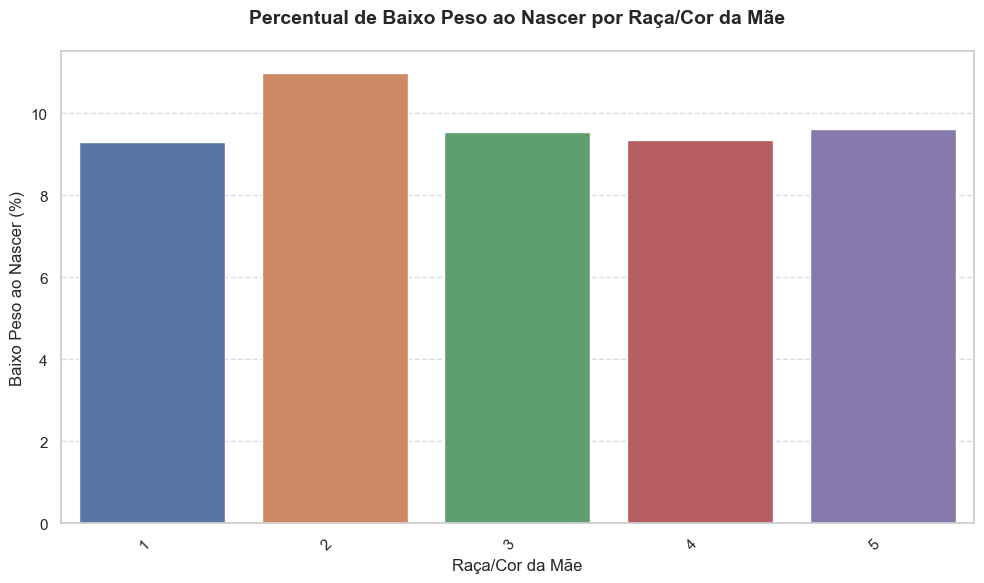

In [79]:
# Set style and figure size
#plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Create plot with custom colors and properties
sns.barplot(data=xtrain_grouped, 
           x="Raça-Cor da Mãe", 
           y="Baixo Peso ao Nascer (%)",
           palette="deep")

# Customize title and labels
plt.title('Percentual de Baixo Peso ao Nascer por Raça/Cor da Mãe', 
          pad=20, 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Raça/Cor da Mãe', fontsize=12)
plt.ylabel('Baixo Peso ao Nascer (%)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()
plt.show()

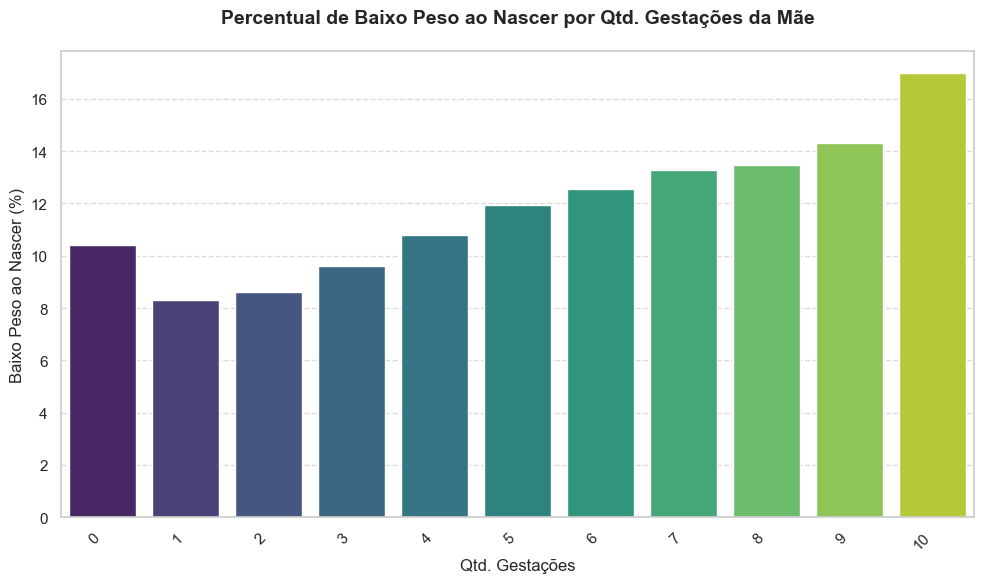

In [80]:
xtrain_grouped = (
    X_train.assign(QTDGESTANT = lambda x: np.where(x['QTDGESTANT'] > 10.0, 10.0, x['QTDGESTANT']))
    .groupby("QTDGESTANT")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDGESTANT = lambda x: x['QTDGESTANT'].astype(int))
    .rename(columns = {"QTDGESTANT": "Qtd. Gestações","PESO_BAIXO" : "Baixo Peso ao Nascer (%)"})
    )

# Set style and figure size
plt.figure(figsize=(10, 6))

# Create plot with custom colors and properties
sns.barplot(data=xtrain_grouped, 
           x="Qtd. Gestações", 
           y="Baixo Peso ao Nascer (%)", 
           palette="viridis")

# Customize title and labels
plt.title('Percentual de Baixo Peso ao Nascer por Qtd. Gestações da Mãe', 
          pad=20, 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Qtd. Gestações', fontsize=12)
plt.ylabel('Baixo Peso ao Nascer (%)', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()
plt.show()

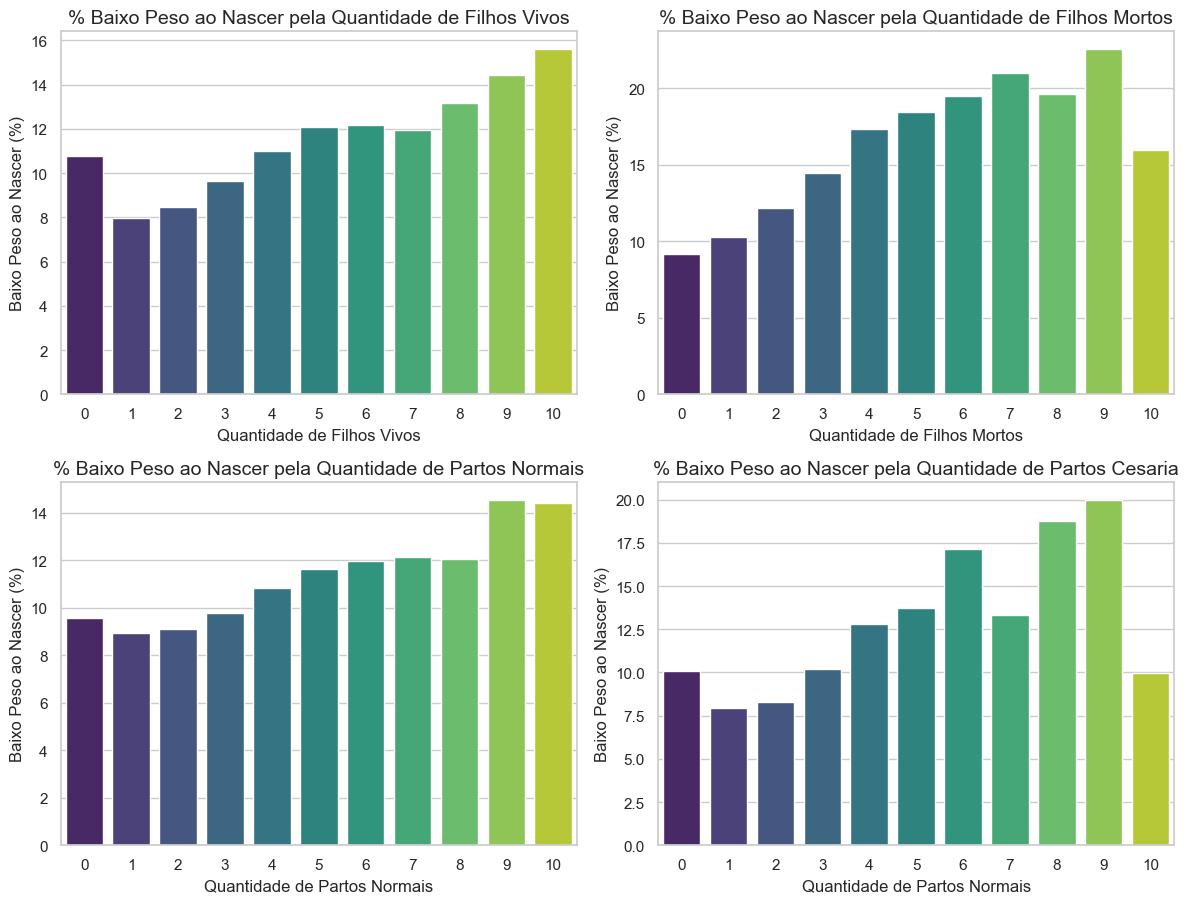

In [81]:
sns.set_theme(style="whitegrid")

# Set figure size for all subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar Plot 1
xtrain_grouped = (
    X_train.assign(QTDFILVIVO = lambda x: np.where(x['QTDFILVIVO'] > 10.0, 10.0, x['QTDFILVIVO']),)
    .groupby("QTDFILVIVO")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDFILVIVO = lambda x: x['QTDFILVIVO'].astype(int))
    )

sns.barplot(data = xtrain_grouped, x="QTDFILVIVO", y="PESO_BAIXO", ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("% Baixo Peso ao Nascer pela Quantidade de Filhos Vivos", fontsize=14)
axes[0, 0].set_xlabel("Quantidade de Filhos Vivos")
axes[0, 0].set_ylabel("Baixo Peso ao Nascer (%)")

# Bar Plot 2
xtrain_grouped = (
    X_train.assign(QTDFILMORT = lambda x: np.where(x['QTDFILMORT'] > 10.0, 10.0, x['QTDFILMORT']))
    .groupby("QTDFILMORT")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDFILMORT = lambda x: x['QTDFILMORT'].astype(int))
    )

sns.barplot(data = xtrain_grouped, x="QTDFILMORT", y="PESO_BAIXO", ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("% Baixo Peso ao Nascer pela Quantidade de Filhos Mortos", fontsize=14)
axes[0, 1].set_xlabel("Quantidade de Filhos Mortos")
axes[0, 1].set_ylabel("Baixo Peso ao Nascer (%)")


# Bar Plot 3
xtrain_grouped = (
    X_train.assign(QTDPARTNOR = lambda x: np.where(x['QTDPARTNOR'] > 10.0, 10.0, x['QTDPARTNOR']))
    .groupby("QTDPARTNOR")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDPARTNOR = lambda x: x['QTDPARTNOR'].astype(int))
    )

sns.barplot(data = xtrain_grouped, x="QTDPARTNOR", y="PESO_BAIXO", ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("% Baixo Peso ao Nascer pela Quantidade de Partos Normais", fontsize=14)
axes[1, 0].set_xlabel("Quantidade de Partos Normais")
axes[1, 0].set_ylabel("Baixo Peso ao Nascer (%)")


# Bar Plot 4
xtrain_grouped = (
    X_train.assign(QTDPARTCES = lambda x: np.where(x['QTDPARTCES'] > 10.0, 10.0, x['QTDPARTCES']))
    .groupby("QTDPARTCES")
    .agg(PESO_BAIXO=('PESO_BAIXO', 'mean'),Total=('PESO_BAIXO', 'size'))
    .reset_index()
    .assign(
        PESO_BAIXO = lambda x: round(x['PESO_BAIXO'] * 100, 2),
        QTDPARTCES = lambda x: x['QTDPARTCES'].astype(int))
    )

sns.barplot(data = xtrain_grouped, x="QTDPARTCES", y="PESO_BAIXO", ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("% Baixo Peso ao Nascer pela Quantidade de Partos Cesaria", fontsize=14)
axes[1, 1].set_xlabel("Quantidade de Partos Normais")
axes[1, 1].set_ylabel("Baixo Peso ao Nascer (%)")

# Adjust layout to make space for titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#plt.savefig("quantidades_4plots.png", dpi=300)

## Variáveis para serem utilizadas no modelo

- "ESTCIVMAE"
- "ESCMAE"
- "RACACORMAE"
- "QTDFILVIVO" 
- "QTDFILMORT" 
- "QTDGESTANT" 
- "QTDPARTNOR"
- "QTDPARTCES" 
- "IDADEPAI"
- "IDADEMAE"
- "GRAVIDEZ"  
- "PARIDADE"

## Variável dependente

- "PESO_BAIXO"